<a href="https://colab.research.google.com/github/ykitaguchi77/CorneAI/blob/main/50_knock_csv_manipulation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**「前原の100本ノック」クラス枚数確認**

スマホ版CorneAI v.s. PC版CorneAI

In [4]:
from google.colab import drive
drive.mount("/content/drive")

import pandas as pd
import numpy as np


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#前処理

In [8]:
# 100問_正解リスト.csvファイルからデータフレームを作成する
ans_df = pd.read_csv('/content/drive/MyDrive/研究/進行中の研究/角膜スマートフォンAIプロジェクト/前原の100問/100問_正解リスト.csv')

# 100問ノック_スマホと細隙灯区分.csvファイルからデータフレームを作成する
knock_df = pd.read_csv('/content/drive/MyDrive/研究/進行中の研究/角膜スマートフォンAIプロジェクト/前原の100問/100問ノック_スマホと細隙灯区分.csv')

In [9]:
import pandas as pd

# "device"の行をdf_answerに追加
ans_df['device'] = ""

# "slit"と"smartphone"の列を取得
slit = knock_df["slit"].tolist()
smartphone = knock_df["smartphone"].tolist()

# "device"列に"slit"と"smartphone"を入力
for i in range(1,101):
    if i in slit:
        ans_df.loc[ans_df["number"]==i, "device"] = "slit"
    elif i in smartphone:
        ans_df.loc[ans_df["number"]==i, "device"] = "smartphone"

# インデックスをリセット
ans_df = ans_df.reset_index(drop=True)


In [10]:
smartphone_df = ans_df[ans_df['device'] == 'smartphone']
smartphone_classification_counts = smartphone_df['classification'].value_counts()
# print("前原100本ノック_スマホ画像の各クラス枚数一覧")
# print(smartphone_classification_counts)

slit_df = ans_df[ans_df['device'] == 'slit']
slit_classification_counts = slit_df['classification'].value_counts()
# print("前原100本ノック_スリット画像の各クラス枚数一覧")
# print(slit_classification_counts)

ans_df = ans_df.replace("腫瘍", "tumor")
ans_df = ans_df.replace("瘢痕", "scar")
ans_df = ans_df.replace("水晶体混濁", "lens-opacity")
ans_df = ans_df.replace("緑内障発作", "APAC")
ans_df = ans_df.replace("感染", "infection")
ans_df = ans_df.replace("非感染", "non-infection")
ans_df = ans_df.replace("水疱性角膜症", "bullous")
ans_df = ans_df.replace("沈着", "deposit")
ans_df = ans_df.replace("正常", "normal")
#ans_df

pd.set_option('display.max_rows', 150)
pd.set_option('display.max_columns', 150)

In [11]:
ans_df.to_csv("/content/drive/MyDrive/研究/進行中の研究/角膜スマートフォンAIプロジェクト/前原の100問/100問_正解リスト_2.csv")

In [12]:
ans_df = pd.read_csv("/content/drive/MyDrive/研究/進行中の研究/角膜スマートフォンAIプロジェクト/前原の100問/100問_正解リスト_2.csv")

#**CorneAI_computerの解析**

In [16]:
import pandas as pd

# 100問_正解リスト.csvファイルからデータフレームを作成する
PC_df = pd.read_csv('/content/drive/MyDrive/研究/進行中の研究/角膜スマートフォンAIプロジェクト/前原の100問/北口先生へ100問corneAIと正解の選択肢.csv')

In [17]:
# クラスを統一されたものに変更する

# 置き換え用の辞書を定義する
replace_dict = {
    '腫瘍性病変（翼状片、扁平上皮癌、デルモイドなど）': 'tumor',
    '瘢痕': 'scar',
    '水晶体混濁（白内障、眼内レンズ眼の嚢混濁や膨隆皮質）': 'lens-opacity',
    '急性緑内障発作': 'APAC',
    '感染性角膜炎（細菌、真菌、上皮型ヘルペス、アメーバ）': 'infection',
    '正常': 'normal',
    '沈着、ジストロフィ（顆粒状、斑状、帯状、格子状など）': 'deposit',
    '非感染性角膜炎（モーレン、周辺部潰瘍、カタル性、フリクテンなど）': 'non-infection',
    '水疱性角膜症': 'bullous'
}

# 置換処理を行う関数を定義する
def replace_text(text):
    if isinstance(text, float):
        return ''
    for key, value in replace_dict.items():
        if key in text:
            return value
    return text

# corneaAIカラムの値を置換する
PC_df['corneaAI'] = PC_df['corneaAI'].apply(lambda x: replace_text(x))

# 正解選択肢カラムの値を置換する
PC_df['正解選択肢'] = PC_df['正解選択肢'].apply(lambda x: replace_text(x) if x else '')

PC_df['device'] = ans_df['device']

In [18]:
# Computerの正答率を計算
num_correct = sum(PC_df['corneaAI'] == PC_df['正解選択肢'])
total_images = len(PC_df)
prob_correct = num_correct / total_images

# deviceがslitのデータで正解率を計算する
slit_df = PC_df[PC_df['device'] == 'slit']
num_correct_slit = sum(slit_df['corneaAI'] == slit_df['正解選択肢'])
total_images_slit = len(slit_df)
prob_correct_slit = num_correct_slit / total_images_slit

# deviceがsmartphoneのデータで正解率を計算する
smartphone_df = PC_df[PC_df['device'] == 'smartphone']
num_correct_smartphone = sum(smartphone_df['corneaAI'] == smartphone_df['正解選択肢'])
total_images_smartphone = len(smartphone_df)
prob_correct_smartphone = num_correct_smartphone / total_images_smartphone

# 結果を出力する
print(f"Computerと正解選択肢が一致する確率は{prob_correct:.2f} ({num_correct}/{total_images})です。")
print(f"deviceがslitのときの正解率は{prob_correct_slit:.2f}({num_correct_slit}/{total_images_slit})です。")
print(f"deviceがsmartphoneのときの正解率は{prob_correct_smartphone:.2f}({num_correct_smartphone}/{total_images_smartphone})です。")

Computerと正解選択肢が一致する確率は0.86 (86/100)です。
deviceがslitのときの正解率は0.88(44/50)です。
deviceがsmartphoneのときの正解率は0.84(42/50)です。


In [19]:
#Computer版の精度解析

def top3(data_df, row):
    # smartphoneの判定の列を取り出す
    cols = data_df.iloc[row, 2:11].astype(float).fillna(0)

    # numpy.argsortを使って、各列の値が降順になるようにインデックスを並び替える
    idx = np.argsort(-cols)

    # インデックスから列名を取得する
    names = cols.index[idx]

    # top1の確率を取得する
    top_prob = cols[names[0]]

    # top3の列名とtop1の確率をリストとして返す
    return [top_prob, names[0], names[1], names[2]]

def read_csv(path):
    try:
        df = pd.read_csv(path, encoding='cp932')
    except:
        df = pd.read_csv(path, encoding='utf-8')
    df_top3 = pd.DataFrame(index=[], columns=[])
    df_top3["number"] = PC_df["number"]
    for row in range(len(df)):
        df_top3.loc[row, ["top1_prob", "top1", "top2", "top3"]] = top3(df, row)
    df_top3["answer"] = PC_df["正解選択肢"]
    df_top3["device"] = PC_df["device"]
    return df_top3


In [20]:
import numpy as np
df_computer = read_csv("/content/drive/MyDrive/研究/進行中の研究/角膜スマートフォンAIプロジェクト/前原の100問/PC版CorneAI前原の100問.csv")
df_computer.to_csv("/content/drive/MyDrive/研究/進行中の研究/角膜スマートフォンAIプロジェクト/前原の100問/computer_top3.csv")

In [21]:
# データの読み込み
data = df_computer

# 全体の計算
top1_matches = (data['top1'] == data['answer']).sum()
top3_matches = ((data['top1'] == data['answer']) |
                (data['top2'] == data['answer']) |
                (data['top3'] == data['answer'])).sum()
high_prob_data = data[data['top1_prob'] >= 0.9]
high_prob_top1_matches = (high_prob_data['top1'] == high_prob_data['answer']).sum()
low_prob_data = data[data['top1_prob'] < 0.9]
low_prob_top1_matches = (low_prob_data['top1'] == low_prob_data['answer']).sum()

# deviceが"slit"のデータ
slit_data = data[data['device'] == 'slit']
slit_top1_matches = (slit_data['top1'] == slit_data['answer']).sum()
slit_top3_matches = ((slit_data['top1'] == slit_data['answer']) |
                     (slit_data['top2'] == slit_data['answer']) |
                     (slit_data['top3'] == slit_data['answer'])).sum()
slit_high_prob_data = slit_data[slit_data['top1_prob'] >= 0.9]
slit_high_prob_matches = (slit_high_prob_data['top1'] == slit_high_prob_data['answer']).sum()
slit_low_prob_data = slit_data[slit_data['top1_prob'] < 0.9]
slit_low_prob_matches = (slit_low_prob_data['top1'] == slit_low_prob_data['answer']).sum()

# deviceが"smartphone"のデータ
smartphone_data = data[data['device'] == 'smartphone']
smartphone_top1_matches = (smartphone_data['top1'] == smartphone_data['answer']).sum()
smartphone_top3_matches = ((smartphone_data['top1'] == smartphone_data['answer']) |
                           (smartphone_data['top2'] == smartphone_data['answer']) |
                           (smartphone_data['top3'] == smartphone_data['answer'])).sum()
smartphone_high_prob_data = smartphone_data[smartphone_data['top1_prob'] >= 0.9]
smartphone_high_prob_matches = (smartphone_high_prob_data['top1'] == smartphone_high_prob_data['answer']).sum()
smartphone_low_prob_data = smartphone_data[smartphone_data['top1_prob'] < 0.9]
smartphone_low_prob_matches = (smartphone_low_prob_data['top1'] == smartphone_low_prob_data['answer']).sum()

# 結果の整形
print(f"全体")
print(f"答えがtop1と一致する確率：{100 * top1_matches / len(data):.2f}%（{top1_matches}/100）")
print(f"答えがtop1, top2, またはtop3と一致する確率：{100 * top3_matches / len(data):.2f}%（{top3_matches}/100）")
print(f"尤度>90の割合：{100 * len(high_prob_data) / len(data):.2f}% ({len(high_prob_data)}/100)")
print(f"尤度>90の場合に答えがtop1と一致する確率：{100 * high_prob_top1_matches / len(high_prob_data) if len(high_prob_data) > 0 else 0:.2f}%（{high_prob_top1_matches}/{len(high_prob_data)})")
print(f"尤度<90の場合に答えがtop1と一致する確率：{100 * low_prob_top1_matches / len(low_prob_data) if len(low_prob_data) > 0 else 0:.2f}%（{low_prob_top1_matches}/{len(low_prob_data)})）")
print("")
print(f"slit")
print(f"答えがtop1と一致する確率：{100 * slit_top1_matches / len(slit_data):.2f}%（{slit_top1_matches}/50）")
print(f"答えがtop1, top2, またはtop3と一致する確率：{100 * slit_top3_matches / len(slit_data):.2f}%（{slit_top3_matches}/50）")
print(f"尤度>90の割合：{100 * len(slit_high_prob_data) / len(slit_data):.2f}% ({len(slit_high_prob_data)}/50)")
print(f"尤度>90の場合に答えがtop1と一致する確率：{100 * slit_high_prob_matches / len(slit_high_prob_data) if len(slit_high_prob_data) > 0 else 0:.2f}%（{slit_high_prob_matches}/{len(slit_high_prob_data)}）")
print(f"尤度<90の場合に答えがtop1と一致する確率：{100 * slit_low_prob_matches / len(slit_low_prob_data) if len(slit_low_prob_data) > 0 else 0:.2f}%（{slit_low_prob_matches}/{len(slit_low_prob_data)}）")
print("")
print(f"smartphone")
print(f"答えがtop1と一致する確率：{100 * smartphone_top1_matches / len(smartphone_data):.2f}% ({smartphone_top1_matches}/50)")
print(f"答えがtop1, top2, またはtop3と一致する確率：{100 * smartphone_top3_matches / len(smartphone_data):.2f}% ({smartphone_top3_matches}/50)")
print(f"尤度>90の割合：{100 * len(smartphone_high_prob_data) / len(smartphone_data):.2f}% ({len(smartphone_high_prob_data)}/50)")
print(f"尤度>90の場合に答えがtop1と一致する確率：{100 * smartphone_high_prob_matches / len(smartphone_high_prob_data) if len(smartphone_high_prob_data) > 0 else 0:.2f}% ({smartphone_high_prob_matches}/{len(smartphone_high_prob_data)})")
print(f"尤度<90の場合に答えがtop1と一致する確率：{100 * smartphone_low_prob_matches / len(smartphone_low_prob_data) if len(smartphone_low_prob_data) > 0 else 0:.2f}% ({smartphone_low_prob_matches}/{len(smartphone_low_prob_data)})")



全体
答えがtop1と一致する確率：83.00%（83/100）
答えがtop1, top2, またはtop3と一致する確率：90.00%（90/100）
尤度>90の割合：58.00% (58/100)
尤度>90の場合に答えがtop1と一致する確率：93.10%（54/58)
尤度<90の場合に答えがtop1と一致する確率：69.05%（29/42)）

slit
答えがtop1と一致する確率：86.00%（43/50）
答えがtop1, top2, またはtop3と一致する確率：92.00%（46/50）
尤度>90の割合：62.00% (31/50)
尤度>90の場合に答えがtop1と一致する確率：93.55%（29/31）
尤度<90の場合に答えがtop1と一致する確率：73.68%（14/19）

smartphone
答えがtop1と一致する確率：80.00% (40/50)
答えがtop1, top2, またはtop3と一致する確率：88.00% (44/50)
尤度>90の割合：54.00% (27/50)
尤度>90の場合に答えがtop1と一致する確率：92.59% (25/27)
尤度<90の場合に答えがtop1と一致する確率：65.22% (15/23)


In [ ]:
df_computer

#**Computer vs Smartphone**

In [ ]:
import os
import numpy as np
from sklearn.metrics import cohen_kappa_score
import pandas as pd
from scipy.stats import ttest_ind
from scipy.stats import mannwhitneyu
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_rel


pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 150)

parent_dir = "/content/drive/MyDrive/研究/進行中の研究/角膜スマートフォンAIプロジェクト/前原の100問"
os.chdir(parent_dir)
os.listdir(parent_dir)



In [185]:
# top1の確率、各top3のindexを出力する

def top3(data_df, row):
    # smartphoneの判定の列を取り出す
    cols = data_df.iloc[row, 2:11].astype(float).fillna(0)

    # numpy.argsortを使って、各列の値が降順になるようにインデックスを並び替える
    idx = np.argsort(-cols)

    # インデックスから列名を取得する
    names = cols.index[idx]

    # top1の確率を取得する
    top_prob = cols[names[0]]

    # top3の列名とtop1の確率をリストとして返す
    return [top_prob, names[0], names[1], names[2]]

def read_csv(path):
    try:
        df = pd.read_csv(path, encoding='cp932')
    except:
        df = pd.read_csv(path, encoding='utf-8')
    df_top3 = pd.DataFrame(index=[], columns=[])
    df_top3["number"] = PC_df["number"]
    for row in range(len(df)):
        df_top3.loc[row, ["top1_prob", "top1", "top2", "top3"]] = top3(df, row)
    #df_top3["computer"] = PC_df["corneaAI"]
    df_top3["computer"] = df_computer["top1"]

    df_top3["answer"] = PC_df["正解選択肢"]
    df_top3["device"] = PC_df["device"]
    return df_top3



def show_accuracy(df, name):
    # answer == top1である確率を計算する
    top1_accuracy = sum(df.apply(lambda row: row['answer'] in [row['top1']], axis=1)) / len(df) * 100
    print(f'答えがtop1と一致する確率: {top1_accuracy:.2f}% ({sum(df["answer"] == df["top1"])}/{len(df)})')

    # 答えがtop1, top2, またはtop3である確率を計算
    top3_accuracy = sum(df.apply(lambda row: row['answer'] in [row['top1'], row['top2'], row['top3']], axis=1)) / len(df) * 100
    print("答えがtop1, top2, またはtop3と一致する確率：{:.2f}% ({}/{})".format(top3_accuracy, sum(df.apply(lambda row: row['answer'] in [row['top1'], row['top2'], row['top3']], axis=1)), len(df)))

    top1_computer = sum(df.apply(lambda row: row['computer'] in [row['top1']], axis=1)) / len(df) * 100
    print(f'computerの判定がtop1と一致する確率: {top1_computer:.2f}% ({sum(df["computer"] == df["top1"])}/{len(df)})')

    cohens_kappa = cohen_kappa_score(df['top1'], df['computer'])
    print(f"cohen's kappa: {cohens_kappa:.2f}")

    top3_computer = sum(df.apply(lambda row: row['computer'] in [row['top1'], row['top2'], row['top3']], axis=1)) / len(df) * 100
    print("computerの判定がtop1, top2, またはtop3と一致する確率：{:.2f}% ({}/{})".format(top3_computer, sum(df.apply(lambda row: row['computer'] in [row['top1'], row['top2'], row['top3']], axis=1)), len(df)))


    output1 = [top1_accuracy, top3_accuracy, top1_computer, cohens_kappa, top3_computer]


    df_copy = df

    # 尤度90以上に限定
    df = df_copy[df_copy['top1_prob'] >= 90]

    # answer == top1である確率を計算する
    top1_accuracy = sum(df.apply(lambda row: row['answer'] in [row['top1']], axis=1)) / len(df) * 100
    print(f'尤度90以上で答えがtop1と一致する確率: {top1_accuracy:.2f}% ({sum(df["answer"] == df["top1"])}/{len(df)})')

    # 答えがtop1, top2, またはtop3である確率を計算
    top3_accuracy = sum(df.apply(lambda row: row['answer'] in [row['top1'], row['top2'], row['top3']], axis=1)) / len(df) * 100
    print("尤度90以上で答えがtop1, top2, またはtop3と一致する確率：{:.2f}% ({}/{})".format(top3_accuracy, sum(df.apply(lambda row: row['answer'] in [row['top1'], row['top2'], row['top3']], axis=1)), len(df)))

    top1_computer = sum(df.apply(lambda row: row['computer'] in [row['top1']], axis=1)) / len(df) * 100
    print(f'尤度90以上でcomputerの判定がtop1と一致する確率: {top1_computer:.2f}% ({sum(df["computer"] == df["top1"])}/{len(df)})')

    top3_computer = sum(df.apply(lambda row: row['computer'] in [row['top1'], row['top2'], row['top3']], axis=1)) / len(df) * 100
    print("尤度90以上でcomputerの判定がtop1, top2, またはtop3と一致する確率：{:.2f}% ({}/{})".format(top3_computer, sum(df.apply(lambda row: row['computer'] in [row['top1'], row['top2'], row['top3']], axis=1)), len(df)))

    output2 = [top1_accuracy, top3_accuracy, top1_computer, top3_computer]
    output = output1+output2


    # 尤度90未満に限定
    df = df_copy[df_copy['top1_prob'] < 90]

    # answer == top1である確率を計算する
    top1_accuracy = sum(df.apply(lambda row: row['answer'] in [row['top1']], axis=1)) / len(df) * 100
    print(f'尤度90未満で答えがtop1と一致する確率: {top1_accuracy:.2f}% ({sum(df["answer"] == df["top1"])}/{len(df)})')

    # 答えがtop1, top2, またはtop3である確率を計算
    top3_accuracy = sum(df.apply(lambda row: row['answer'] in [row['top1'], row['top2'], row['top3']], axis=1)) / len(df) * 100
    print("尤度90未満で答えがtop1, top2, またはtop3と一致する確率：{:.2f}% ({}/{})".format(top3_accuracy, sum(df.apply(lambda row: row['answer'] in [row['top1'], row['top2'], row['top3']], axis=1)), len(df)))

    top1_computer = sum(df.apply(lambda row: row['computer'] in [row['top1']], axis=1)) / len(df) * 100
    print(f'尤度90未満でcomputerの判定がtop1と一致する確率: {top1_computer:.2f}% ({sum(df["computer"] == df["top1"])}/{len(df)})')

    top3_computer = sum(df.apply(lambda row: row['computer'] in [row['top1'], row['top2'], row['top3']], axis=1)) / len(df) * 100
    print("尤度90未満でcomputerの判定がtop1, top2, またはtop3と一致する確率：{:.2f}% ({}/{})".format(top3_computer, sum(df.apply(lambda row: row['computer'] in [row['top1'], row['top2'], row['top3']], axis=1)), len(df)))

    output2 = [top1_accuracy, top3_accuracy, top1_computer, top3_computer]
    output = output1+output2

    print("")
    print("")

    return output




def calculate_accuracy(df, name):
    df_all = df
    df_smartphone = df[df["device"] == "smartphone"]
    df_slit = df[df["device"] == "slit"]

    output = []

    print("all")
    output.extend(show_accuracy(df, name))

    print("smartphone")
    output.extend(show_accuracy(df_smartphone, name))

    print("slit")
    output.extend(show_accuracy(df_slit, name))

    return output


#すべての判定一致群と、1つ以上不一致のある群とで、尤度を比較する
def likelihood_comparison(data_list):
    #空のdataframeを作成
    df_comparison_top1, df_comparison_top1_slit, df_comparison_top1_smartphone = pd.DataFrame(index=[], columns=[]), pd.DataFrame(index=[], columns=[]), pd.DataFrame(index=[], columns=[])
    df_comparison_top1_prob, df_comparison_top1_prob_slit, df_comparison_top1_prob_smartphone = pd.DataFrame(index=[], columns=[]), pd.DataFrame(index=[], columns=[]), pd.DataFrame(index=[], columns=[])

    for i, path in enumerate(data_list):
        temp_df = read_csv(path)
        df_comparison_top1[f"{i}"] = temp_df["top1"]
        df_comparison_top1_prob[f"{i}"] = temp_df["top1_prob"]

    df_comparison_top1_slit = df_comparison_top1[temp_df["device"]=="slit"]
    df_comparison_top1_smartphone = df_comparison_top1[temp_df["device"]=="smartphone"]
    df_comparison_top1_prob_slit = df_comparison_top1_prob[temp_df["device"]=="slit"]
    df_comparison_top1_prob_smartphone = df_comparison_top1_prob[temp_df["device"]=="smartphone"]

    comparison(df_comparison_top1, df_comparison_top1_prob, "All")
    comparison(df_comparison_top1_slit, df_comparison_top1_prob_slit, "Slit")
    comparison(df_comparison_top1_smartphone, df_comparison_top1_prob_smartphone, "Smartphone")


def likelihood_comparison(data_list):
    # 空のdataframeを作成
    df_comparison_top1, df_comparison_top1_slit, df_comparison_top1_smartphone = pd.DataFrame(index=[], columns=[]), pd.DataFrame(index=[], columns=[]), pd.DataFrame(index=[], columns=[])
    df_comparison_top1_prob, df_comparison_top1_prob_slit, df_comparison_top1_prob_smartphone = pd.DataFrame(index=[], columns=[]), pd.DataFrame(index=[], columns=[]), pd.DataFrame(index=[], columns=[])

    for i, path in enumerate(data_list):
        temp_df = read_csv(path)
        df_comparison_top1[f"{i}"] = temp_df["top1"]
        df_comparison_top1_prob[f"{i}"] = temp_df["top1_prob"]

    df_comparison_top1_slit = df_comparison_top1[temp_df["device"]=="slit"]
    df_comparison_top1_smartphone = df_comparison_top1[temp_df["device"]=="smartphone"]
    df_comparison_top1_prob_slit = df_comparison_top1_prob[temp_df["device"]=="slit"]
    df_comparison_top1_prob_smartphone = df_comparison_top1_prob[temp_df["device"]=="smartphone"]

    all_equal_probs, all_not_equal_probs = comparison(df_comparison_top1, df_comparison_top1_prob, "All")
    slit_equal_probs, slit_not_equal_probs = comparison(df_comparison_top1_slit, df_comparison_top1_prob_slit, "Slit")
    smartphone_equal_probs, smartphone_not_equal_probs = comparison(df_comparison_top1_smartphone, df_comparison_top1_prob_smartphone, "Smartphone")

    # SlitとSmartphoneの全画像におけるlikelihoodを対応のあるt検定で比較
    slit_means = df_comparison_top1_prob_slit.mean(axis=1)
    smartphone_means = df_comparison_top1_prob_smartphone.mean(axis=1)
    t_stat, p_value = ttest_rel(slit_means, smartphone_means)
    df_effect_size = len(slit_means) - 1  # 自由度

    # Mean and SD likelihood for both groups
    mean_slit, sd_slit = slit_means.mean(), slit_means.std()
    mean_smartphone, sd_smartphone = smartphone_means.mean(), smartphone_means.std()

    print(f"Paired t-test between Slit and Smartphone:")
    print(f"  Slit Mean likelihood: {mean_slit:.5f}, SD likelihood: {sd_slit:.5f}")
    print(f"  Smartphone Mean likelihood: {mean_smartphone:.5f}, SD likelihood: {sd_smartphone:.5f}")
    print(f"  t-statistic: {t_stat:.5f}")
    print(f"  p-value: {p_value:.5f}")
    print(f"  Degrees of Freedom: {df_effect_size}")
    print("")
    if p_value < 0.05:
        print("  Result: The differences between the Slit and Smartphone groups are statistically significant.")
    else:
        print("  Result: The differences between the Slit and Smartphone groups are not statistically significant.")
    print("")


    plot_combined_boxplot(all_equal_probs, all_not_equal_probs,
                          slit_equal_probs, slit_not_equal_probs,
                          smartphone_equal_probs, smartphone_not_equal_probs)

def comparison(df_top1, df_top1_prob, device):
    # Identifying rows where all columns are equal
    all_equal = df_top1.apply(lambda row: len(set(row)) == 1, axis=1)

    # Splitting probabilities based on the 'all_equal' column
    equal_probs = df_top1_prob[all_equal]
    not_equal_probs = df_top1_prob[~all_equal]

    # Calculating the sample sizes for both groups
    equal_sample_size = len(equal_probs)
    not_equal_sample_size = len(not_equal_probs)

    # Calculating the mean for both groups without flatten
    equal_mean, equal_std = equal_probs.mean(axis=0).mean(), equal_probs.std(axis=0).mean()
    not_equal_mean, not_equal_std = not_equal_probs.mean(axis=0).mean(), not_equal_probs.std(axis=0).mean()

    # Performing Wilcoxon test（標本数が少ないのでWilcoxonにする）
    try:
        t_stat, p_value = mannwhitneyu(equal_probs.values.flatten(), not_equal_probs.values.flatten(), alternative='two-sided')
    except:
        pass

    # Creating a dataframe to represent the results
    print(f"{device}")
    results_df = pd.DataFrame({
        "Group": ["All Match", "Not All Match"],
        "Sample Size": [equal_sample_size, not_equal_sample_size],
        "Mean_likelihood": [equal_mean, not_equal_mean],
        "SD_likelihood": [equal_std, not_equal_std],
    })
    try:
        print(f"Mann-Whitney-U test --> t_stat: {t_stat}, p_value: {format(p_value, 'f')}")
        print(results_df)
    except:
        print(results_df)
        pass
    print("")

    return equal_probs, not_equal_probs

def plot_combined_boxplot(all_equal_probs, all_not_equal_probs,
                          slit_equal_probs, slit_not_equal_probs,
                          smartphone_equal_probs, smartphone_not_equal_probs):
    # Preparing the data
    all_equal_data = all_equal_probs.values.flatten()
    all_not_equal_data = all_not_equal_probs.values.flatten()

    slit_equal_data = slit_equal_probs.values.flatten()
    slit_not_equal_data = slit_not_equal_probs.values.flatten()

    smartphone_equal_data = smartphone_equal_probs.values.flatten()
    smartphone_not_equal_data = smartphone_not_equal_probs.values.flatten()

    group_labels = []
    likelihoods = []

    # For All
    if len(all_not_equal_data) > 0:
        group_labels.extend(['All Match (All)'] * len(all_equal_data))
        likelihoods.extend(list(all_equal_data))
        group_labels.extend(['Not All Match (All)'] * len(all_not_equal_data))
        likelihoods.extend(list(all_not_equal_data))
    else:
        group_labels.extend(['All'] * len(all_equal_data))
        likelihoods.extend(list(all_equal_data))

    # For Slit
    if len(slit_not_equal_data) > 0:
        group_labels.extend(['All Match (Slit)'] * len(slit_equal_data))
        likelihoods.extend(list(slit_equal_data))
        group_labels.extend(['Not All Match (Slit)'] * len(slit_not_equal_data))
        likelihoods.extend(list(slit_not_equal_data))
    else:
        group_labels.extend(['Slit'] * len(slit_equal_data))
        likelihoods.extend(list(slit_equal_data))

    # For Smartphone
    if len(smartphone_not_equal_data) > 0:
        group_labels.extend(['All Match (Smartphone)'] * len(smartphone_equal_data))
        likelihoods.extend(list(smartphone_equal_data))
        group_labels.extend(['Not All Match (Smartphone)'] * len(smartphone_not_equal_data))
        likelihoods.extend(list(smartphone_not_equal_data))
    else:
        group_labels.extend(['Smartphone'] * len(smartphone_equal_data))
        likelihoods.extend(list(smartphone_equal_data))

    data = pd.DataFrame({
        'Group': group_labels,
        'Likelihood': likelihoods
    })

    # Plotting the boxplot
    if len(all_not_equal_data) > 0:
        plt.figure(figsize=(18, 6))
    if len(all_not_equal_data) <= 0:
        plt.figure(figsize=(12, 6))
    sns.boxplot(x='Group', y='Likelihood', data=data)
    plt.title('Distribution of Likelihood by Images')
    plt.ylabel('Likelihood')
    plt.xlabel('Images')
    # if len(all_not_equal_data) > 0:
    #     plt.xticks(rotation=45)
    # plt.tight_layout()

    plt.show()


def paired_t_test(slit_probs, smartphone_probs):
    # 両方のデータセットが同じ長さであることを確認
    assert len(slit_probs) == len(smartphone_probs), "Data lengths are not equal."

    # 対応のあるt検定を実行
    t_stat, p_value = ttest_rel(slit_probs, smartphone_probs)

    print(f"Paired t-test --> t_stat: {t_stat}, p_value: {format(p_value, '.5f')}")

    if p_value < 0.05:
        print("The differences between the groups are statistically significant.")
    else:
        print("The differences between the groups are not statistically significant.")


In [163]:
# 結果をまとめるためのdataframeを作成
base = ["top1_accuracy", "top3_accuracy", "top1_computer", "cohen's kappa", "top3_computer", "likelihood90_top1_accuracy", "likelihood90_top3_accuracy", "likelihood90_top1_computer", "likelihood90_top3_computer"]
all = ["all_" + item for item in base]
smartphone = ["smartphone_" + item for item in base]
slit = ["slit_" + item for item in base]
index = all+smartphone+slit

df_result = pd.DataFrame(index=index, columns=[])

All
           Group  Sample Size  Mean_likelihood  SD_likelihood
0      All Match          100         0.872341       0.140901
1  Not All Match            0              NaN            NaN

Slit
           Group  Sample Size  Mean_likelihood  SD_likelihood
0      All Match           50         0.879184       0.150256
1  Not All Match            0              NaN            NaN

Smartphone
           Group  Sample Size  Mean_likelihood  SD_likelihood
0      All Match           50         0.865498       0.132057
1  Not All Match            0              NaN            NaN

Paired t-test between Slit and Smartphone:
  Slit Mean likelihood: 0.87918, SD likelihood: 0.15026
  Smartphone Mean likelihood: 0.86550, SD likelihood: 0.13206
  t-statistic: 0.54978
  p-value: 0.58497
  Degrees of Freedom: 49

  Result: The differences between the Slit and Smartphone groups are not statistically significant.



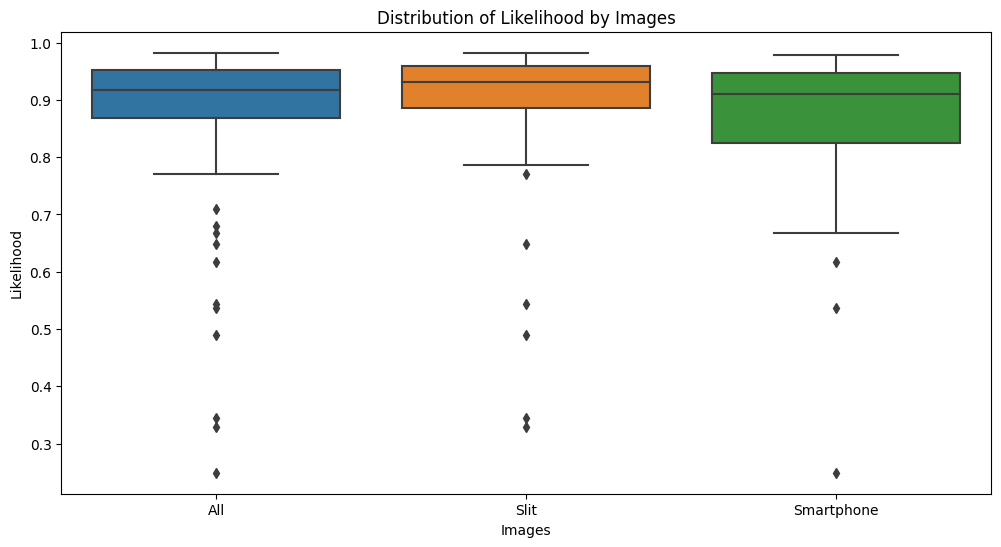

In [180]:
#コンピュータ版の尤度分布
likelihood_comparison(["/content/drive/MyDrive/研究/進行中の研究/角膜スマートフォンAIプロジェクト/前原の100問/PC版CorneAI前原の100問.csv"])

thinkpad
all
答えがtop1と一致する確率: 81.00% (81/100)
答えがtop1, top2, またはtop3と一致する確率：93.00% (93/100)
computerの判定がtop1と一致する確率: 84.00% (84/100)
cohen's kappa: 0.82
computerの判定がtop1, top2, またはtop3と一致する確率：97.00% (97/100)
尤度90以上で答えがtop1と一致する確率: 88.57% (62/70)
尤度90以上で答えがtop1, top2, またはtop3と一致する確率：91.43% (64/70)
尤度90以上でcomputerの判定がtop1と一致する確率: 91.43% (64/70)
尤度90以上でcomputerの判定がtop1, top2, またはtop3と一致する確率：95.71% (67/70)
尤度90未満で答えがtop1と一致する確率: 63.33% (19/30)
尤度90未満で答えがtop1, top2, またはtop3と一致する確率：96.67% (29/30)
尤度90未満でcomputerの判定がtop1と一致する確率: 66.67% (20/30)
尤度90未満でcomputerの判定がtop1, top2, またはtop3と一致する確率：100.00% (30/30)


smartphone
答えがtop1と一致する確率: 72.00% (36/50)
答えがtop1, top2, またはtop3と一致する確率：88.00% (44/50)
computerの判定がtop1と一致する確率: 82.00% (41/50)
cohen's kappa: 0.79
computerの判定がtop1, top2, またはtop3と一致する確率：96.00% (48/50)
尤度90以上で答えがtop1と一致する確率: 80.00% (24/30)
尤度90以上で答えがtop1, top2, またはtop3と一致する確率：83.33% (25/30)
尤度90以上でcomputerの判定がtop1と一致する確率: 86.67% (26/30)
尤度90以上でcomputerの判定がtop1, top2, またはtop3と一致する確率：93.33% (28

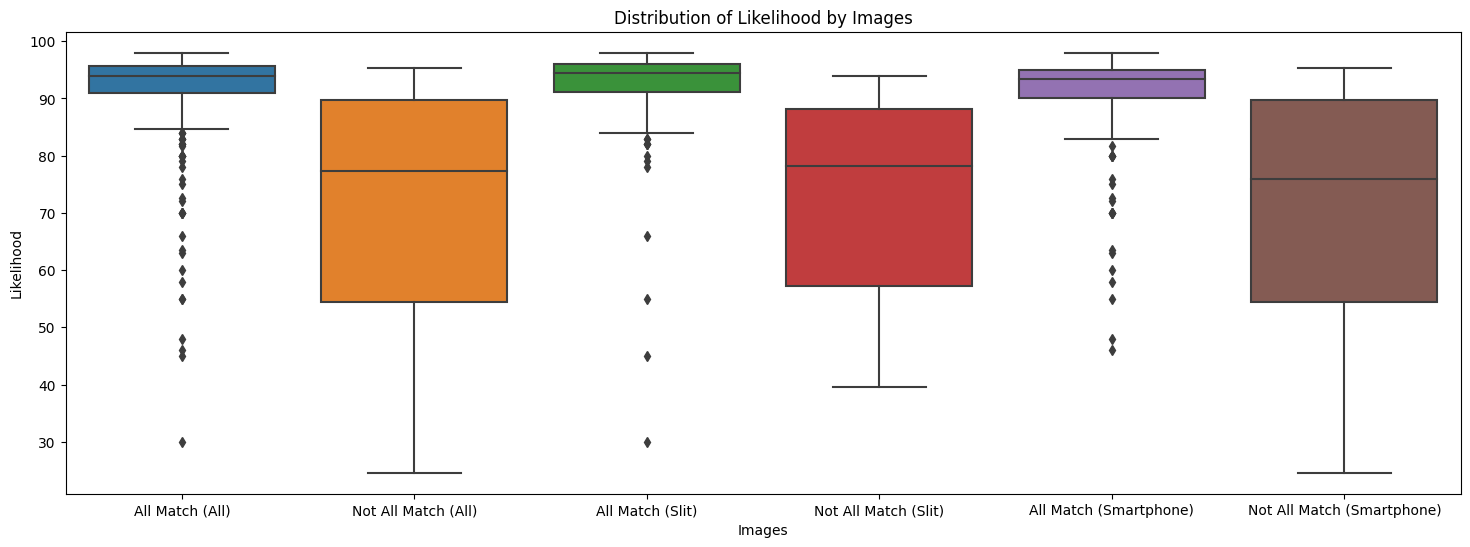

In [181]:
monitor_list = ["PC_vs_smartphone_thinkpad1.csv", "PC_vs_smartphone_macbookpro1.csv", 'PC_vs_smartphone_karute_kitaguchi.csv', 'PC_vs_smartphone_omen.csv']

df_0 = read_csv(monitor_list[0])
df_1 = read_csv(monitor_list[1])
df_2 = read_csv(monitor_list[2])
df_3 = read_csv(monitor_list[3])

print("thinkpad")
output = calculate_accuracy(df_0, "thinkpad")
df_result["thinkpad"] = output

print("macbookpro")
output = calculate_accuracy(df_1, "macbookpro")
df_result["macbookpro"] = output

print("eizo")
output = calculate_accuracy(df_1, "eizo")
df_result["eizo"] = output

print("omen")
output = calculate_accuracy(df_3, "omen")
df_result["omen"] = output

likelihood_comparison(monitor_list)

### confusion matrix between computer and smartphone diagnosis

In [ ]:
#show matrix between computer and macbook pro
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Update the specified order of labels by replacing 'cataract' with 'lens-opacity'
corrected_labels = ["normal", "infection", "non-infection", "scar", "deposit", "APAC", "tumor", "bullous", "lens-opacity"]

# Compute the confusion matrix using the corrected labels
cm_corrected = confusion_matrix(df_1['top1'], df_1['computer'], labels=corrected_labels)

# Plot the confusion matrix for device == "slit" separately
plt.figure(figsize=(14, 12))
ax = sns.heatmap(cm_corrected, annot=True, fmt='g', cmap='Blues',
                  xticklabels=corrected_labels, yticklabels=corrected_labels, annot_kws={"size": 18})
# Adjust font sizes for labels, ticks and title
ax.set_xlabel('Computer Prediction', fontsize=20)
ax.set_ylabel('Smartphone Prediction', fontsize=20)
ax.set_title('Computer vs Smartphone', fontsize=24)
ax.tick_params(axis='both', which='major', labelsize=16)
plt.xticks(rotation=90)
plt.yticks(rotation=0)

# Save the figure
file_path = "/content/confusion_matrix.png"
plt.savefig(file_path, dpi=300)

plt.show()



In [ ]:
#confusion matrix separately by the device

# Filter data based on the device type
df_slit_3 = df_1[df_1['device'] == 'slit']
df_smartphone_3 = df_1[df_1['device'] == 'smartphone']

# Compute the confusion matrices for each subset
cm_slit_3 = confusion_matrix(df_slit_3['top1'], df_slit_3['computer'], labels=corrected_labels)
cm_smartphone_3 = confusion_matrix(df_smartphone_3['top1'], df_smartphone_3['computer'], labels=corrected_labels)

# Plot the confusion matrix for device == "slit" separately
plt.figure(figsize=(14, 12))
ax = sns.heatmap(cm_slit_3, annot=True, fmt='g', cmap='Blues',
                  xticklabels=corrected_labels, yticklabels=corrected_labels, annot_kws={"size": 18})
# Adjust font sizes for labels, ticks and title
ax.set_xlabel('Computer Prediction', fontsize=20)
ax.set_ylabel('Smartphone Prediction', fontsize=20)
ax.set_title('Computer vs Smartphone', fontsize=24)
ax.tick_params(axis='both', which='major', labelsize=16)
plt.xticks(rotation=90)
plt.yticks(rotation=0)

plt.tight_layout()
# Save the figure
file_path = "/content/confusion_matrix_slit.png"
plt.savefig(file_path, dpi=300)
plt.show()

# Plot the confusion matrix for device == "smartphone" separately
plt.figure(figsize=(14, 12))
ax = sns.heatmap(cm_smartphone_3, annot=True, fmt='g', cmap='Blues',
                  xticklabels=corrected_labels, yticklabels=corrected_labels, annot_kws={"size": 18})
# Adjust font sizes for labels, ticks and title
ax.set_xlabel('Computer Prediction', fontsize=20)
ax.set_ylabel('Smartphone Prediction', fontsize=20)
ax.set_title('Computer vs Smartphone', fontsize=24)
ax.tick_params(axis='both', which='major', labelsize=16)
plt.xticks(rotation=90)
plt.yticks(rotation=0)

plt.tight_layout()
# Save the figure
file_path = "/content/confusion_matrix_smartphone.png"
plt.savefig(file_path, dpi=300)
plt.show()




In [34]:
#一致率とCohen's Kappa
from sklearn.metrics import cohen_kappa_score, accuracy_score

# Calculate accuracy and Cohen's Kappa for the entire dataset
accuracy_all = accuracy_score(df_1['top1'], df_1['computer'])
kappa_all = cohen_kappa_score(df_1['top1'], df_1['computer'])

# Calculate accuracy and Cohen's Kappa for the slit images
accuracy_slit = accuracy_score(df_slit_3['top1'], df_slit_3['computer'])
kappa_slit = cohen_kappa_score(df_slit_3['top1'], df_slit_3['computer'])

# Calculate accuracy and Cohen's Kappa for the smartphone images
accuracy_smartphone = accuracy_score(df_smartphone_3['top1'], df_smartphone_3['computer'])
kappa_smartphone = cohen_kappa_score(df_smartphone_3['top1'], df_smartphone_3['computer'])

# Create a table with the results
results = pd.DataFrame({
    'Dataset': ['All Images', 'Slit Images', 'Smartphone Images'],
    'Accuracy (%)': [accuracy_all*100, accuracy_slit*100, accuracy_smartphone*100],
    "Cohen's Kappa": [kappa_all, kappa_slit, kappa_smartphone]
})

results


,Dataset,Accuracy (%),Cohen's Kappa
0,All Images,88.0,0.863326
1,Slit Images,90.0,0.886827
2,Smartphone Images,86.0,0.838561


###Repeatability analysis

macbookpro1
all
答えがtop1と一致する確率: 79.00% (79/100)
答えがtop1, top2, またはtop3と一致する確率：92.00% (92/100)
computerの判定がtop1と一致する確率: 88.00% (88/100)
cohen's kappa: 0.86
computerの判定がtop1, top2, またはtop3と一致する確率：99.00% (99/100)
尤度90以上で答えがtop1と一致する確率: 91.04% (61/67)
尤度90以上で答えがtop1, top2, またはtop3と一致する確率：95.52% (64/67)
尤度90以上でcomputerの判定がtop1と一致する確率: 97.01% (65/67)
尤度90以上でcomputerの判定がtop1, top2, またはtop3と一致する確率：100.00% (67/67)
尤度90未満で答えがtop1と一致する確率: 54.55% (18/33)
尤度90未満で答えがtop1, top2, またはtop3と一致する確率：84.85% (28/33)
尤度90未満でcomputerの判定がtop1と一致する確率: 69.70% (23/33)
尤度90未満でcomputerの判定がtop1, top2, またはtop3と一致する確率：96.97% (32/33)


smartphone
答えがtop1と一致する確率: 70.00% (35/50)
答えがtop1, top2, またはtop3と一致する確率：86.00% (43/50)
computerの判定がtop1と一致する確率: 86.00% (43/50)
cohen's kappa: 0.84
computerの判定がtop1, top2, またはtop3と一致する確率：98.00% (49/50)
尤度90以上で答えがtop1と一致する確率: 83.33% (25/30)
尤度90以上で答えがtop1, top2, またはtop3と一致する確率：90.00% (27/30)
尤度90以上でcomputerの判定がtop1と一致する確率: 96.67% (29/30)
尤度90以上でcomputerの判定がtop1, top2, またはtop3と一致する確率：100.00%

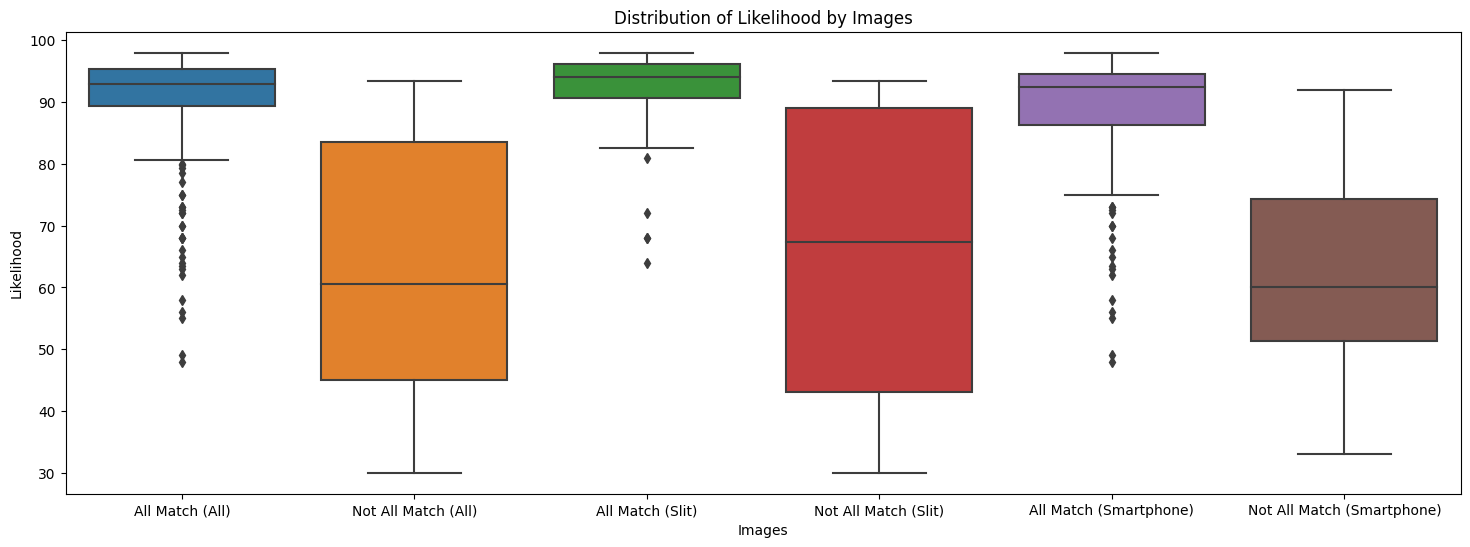

In [182]:
repeatability_list = ["PC_vs_smartphone_macbookpro1.csv", "PC_vs_smartphone_macbookpro2.csv", 'PC_vs_smartphone_macbookpro3.csv']

df_0 = read_csv(repeatability_list[0])
df_1 = read_csv(repeatability_list[1])
df_2 = read_csv(repeatability_list[2])

print("macbookpro1")
output = calculate_accuracy(df_0, "1")
df_result["macbookpro1"] = output
print("macbookpro2")
output = calculate_accuracy(df_1, "2")
df_result["macbookpro2"] = output
print("macbookpro3")
output = calculate_accuracy(df_2, "3")
df_result["macbookpro3"] = output

likelihood_comparison(repeatability_list)

iPhone11
all
答えがtop1と一致する確率: 79.00% (79/100)
答えがtop1, top2, またはtop3と一致する確率：95.00% (95/100)
computerの判定がtop1と一致する確率: 87.00% (87/100)
cohen's kappa: 0.85
computerの判定がtop1, top2, またはtop3と一致する確率：99.00% (99/100)
尤度90以上で答えがtop1と一致する確率: 88.57% (62/70)
尤度90以上で答えがtop1, top2, またはtop3と一致する確率：97.14% (68/70)
尤度90以上でcomputerの判定がtop1と一致する確率: 95.71% (67/70)
尤度90以上でcomputerの判定がtop1, top2, またはtop3と一致する確率：100.00% (70/70)
尤度90未満で答えがtop1と一致する確率: 56.67% (17/30)
尤度90未満で答えがtop1, top2, またはtop3と一致する確率：90.00% (27/30)
尤度90未満でcomputerの判定がtop1と一致する確率: 66.67% (20/30)
尤度90未満でcomputerの判定がtop1, top2, またはtop3と一致する確率：96.67% (29/30)


smartphone
答えがtop1と一致する確率: 72.00% (36/50)
答えがtop1, top2, またはtop3と一致する確率：92.00% (46/50)
computerの判定がtop1と一致する確率: 84.00% (42/50)
cohen's kappa: 0.82
computerの判定がtop1, top2, またはtop3と一致する確率：100.00% (50/50)
尤度90以上で答えがtop1と一致する確率: 84.38% (27/32)
尤度90以上で答えがtop1, top2, またはtop3と一致する確率：93.75% (30/32)
尤度90以上でcomputerの判定がtop1と一致する確率: 93.75% (30/32)
尤度90以上でcomputerの判定がtop1, top2, またはtop3と一致する確率：100.00% (

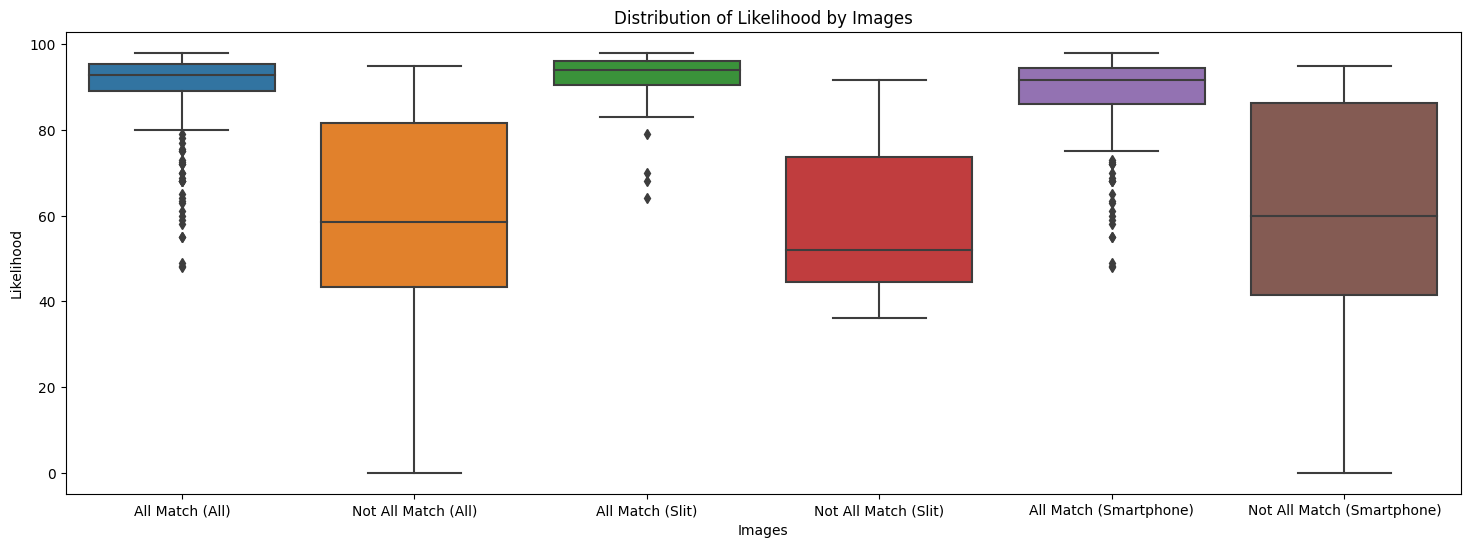

In [183]:
# macbookpro使用、iPhone11pro, iPhone13pro, iPhone14pro
iPhone_list = ["PC_vs_smartphone_iPhone11.csv", 'PC_vs_smartphone_macbookpro1.csv', "PC_vs_smartphone_iPhone14.csv"]

df_0 = read_csv(iPhone_list[0])
df_1 = read_csv(iPhone_list[1])
df_2 = read_csv(iPhone_list[2])

print("iPhone11")
output = calculate_accuracy(df_0, "iphone11")
df_result["iphone11"] = output
print("iPhone13")
output = calculate_accuracy(df_1, "iphone13")
df_result["iphone13"] = output
print("iPhone14")
output = calculate_accuracy(df_2, "iphone14")
df_result["iphone14"] = output

likelihood_comparison(iPhone_list)

yoshinaga
all
答えがtop1と一致する確率: 82.00% (82/100)
答えがtop1, top2, またはtop3と一致する確率：93.00% (93/100)
computerの判定がtop1と一致する確率: 85.00% (85/100)
cohen's kappa: 0.83
computerの判定がtop1, top2, またはtop3と一致する確率：97.00% (97/100)
尤度90以上で答えがtop1と一致する確率: 93.42% (71/76)
尤度90以上で答えがtop1, top2, またはtop3と一致する確率：96.05% (73/76)
尤度90以上でcomputerの判定がtop1と一致する確率: 93.42% (71/76)
尤度90以上でcomputerの判定がtop1, top2, またはtop3と一致する確率：98.68% (75/76)
尤度90未満で答えがtop1と一致する確率: 45.83% (11/24)
尤度90未満で答えがtop1, top2, またはtop3と一致する確率：83.33% (20/24)
尤度90未満でcomputerの判定がtop1と一致する確率: 58.33% (14/24)
尤度90未満でcomputerの判定がtop1, top2, またはtop3と一致する確率：91.67% (22/24)


smartphone
答えがtop1と一致する確率: 76.00% (38/50)
答えがtop1, top2, またはtop3と一致する確率：92.00% (46/50)
computerの判定がtop1と一致する確率: 84.00% (42/50)
cohen's kappa: 0.82
computerの判定がtop1, top2, またはtop3と一致する確率：98.00% (49/50)
尤度90以上で答えがtop1と一致する確率: 93.94% (31/33)
尤度90以上で答えがtop1, top2, またはtop3と一致する確率：96.97% (32/33)
尤度90以上でcomputerの判定がtop1と一致する確率: 96.97% (32/33)
尤度90以上でcomputerの判定がtop1, top2, またはtop3と一致する確率：100.00% (3

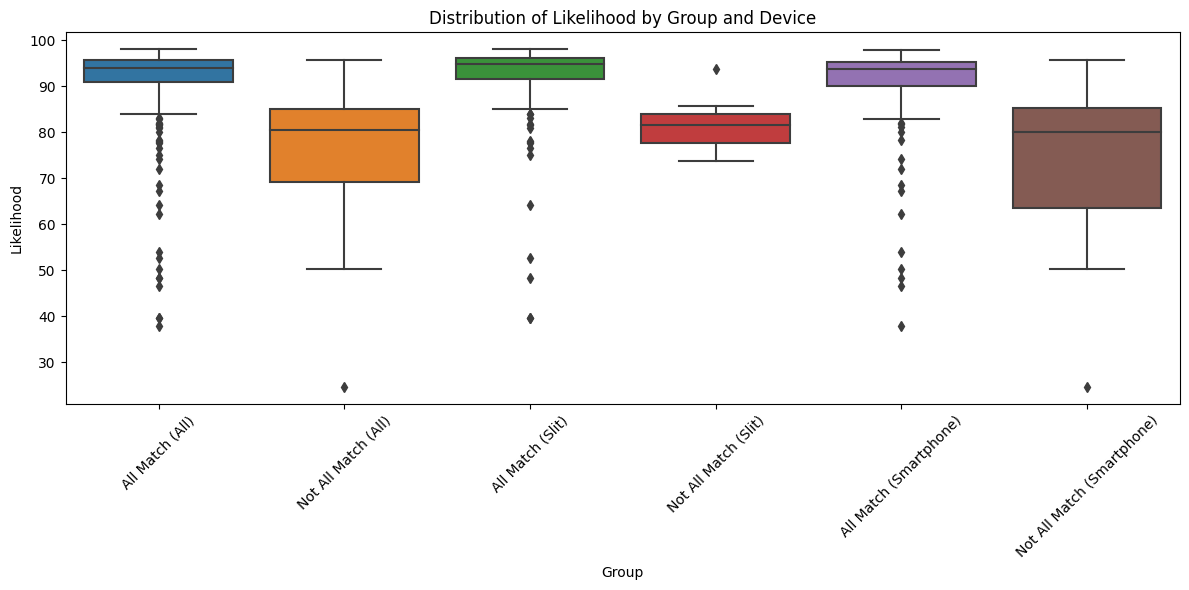

In [148]:
reproducibility_list = ["PC_vs_smartphone_karute_yoshinaga.csv", "PC_vs_smartphone_karute_kitaguchi.csv", 'PC_vs_smartphone_karute_iwasaki.csv']

df_0 = read_csv(reproducibility_list[0])
df_1 = read_csv(reproducibility_list[1])
df_2 = read_csv(reproducibility_list[2])

print("yoshinaga")
output = calculate_accuracy(df_0, "1")
df_result["yoshinaga"] = output
print("kitaguchi")
output = calculate_accuracy(df_1, "2")
df_result["kitaguchi"] = output
print("iwasaki")
output = calculate_accuracy(df_2, "3")
df_result["iwasaki"] = output

likelihood_comparison(reproducibility_list)

                0              1              2              3              4  \
0           tumor          tumor          tumor          tumor          tumor   
1            scar           scar           scar           scar           scar   
2            scar           scar           scar           scar           scar   
3            APAC           APAC           APAC           APAC           APAC   
4       infection      infection      infection      infection      infection   
5       infection      infection      infection      infection      infection   
6    lens-opacity   lens-opacity   lens-opacity         normal   lens-opacity   
7          normal         normal         normal         normal         normal   
8          normal         normal         normal         normal         normal   
9            scar           scar           scar           scar           scar   
10        deposit        deposit        deposit        deposit        deposit   
11          tumor          t

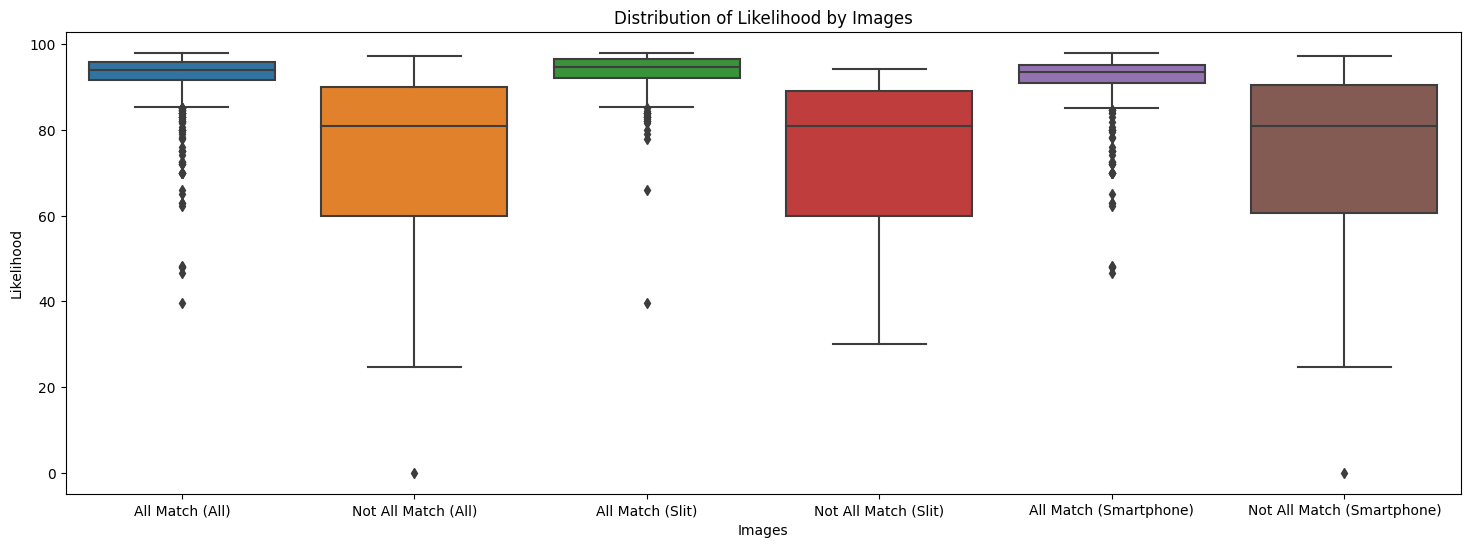

In [187]:
all_list = ["PC_vs_smartphone_thinkpad1.csv", "PC_vs_smartphone_macbookpro1.csv", 'PC_vs_smartphone_karute_kitaguchi.csv', 'PC_vs_smartphone_omen.csv', "PC_vs_smartphone_macbookpro1.csv", "PC_vs_smartphone_macbookpro2.csv", 'PC_vs_smartphone_macbookpro3.csv', "PC_vs_smartphone_iPhone11.csv", 'PC_vs_smartphone_macbookpro1.csv', "PC_vs_smartphone_iPhone14.csv", "PC_vs_smartphone_karute_yoshinaga.csv", "PC_vs_smartphone_karute_kitaguchi.csv", 'PC_vs_smartphone_karute_iwasaki.csv']
likelihood_comparison(all_list)

In [23]:
df_result = df_result.round(2)
df_result
df_result.to_csv("/content/drive/MyDrive/研究/進行中の研究/角膜スマートフォンAIプロジェクト/前原の100問/result_accuacy.csv")


# **Calculate Fleiss Kappa**

In [24]:
from statsmodels.stats.inter_rater import fleiss_kappa

def calculate_fleiss_kappa (df_monitor):
    categories = {
        'tumor': 0,
        'scar': 1,
        'lens-opacity': 2,
        'APAC': 3,
        'infection': 4,
        'normal': 5,
        'deposit': 6,
        'non-infection': 7,
        'bullous': 8
    }

    try:
        df_monitor = df_monitor.drop(["Answer", "PC", "device"], axis=1).replace(categories)
        print(df_monitor)
    except:
        pass

    # 同意度の表を作成
    n_categories = 10
    table = np.zeros((len(df_monitor.index), n_categories))
    for i, row in df_monitor.iterrows():
        for j in range(n_categories):
            table[i, j] = sum(row == j)

    # Fleiss' Kappa の計算
    kappa = fleiss_kappa(table, method='fleiss')
    print('Fleiss\' Kappa: {:.3f}'.format(kappa))



    # 全て一致しているものの割合を計算
    all_match_count = len(df_monitor.loc[(df_monitor['df_0'] == df_monitor['df_1']) & (df_monitor['df_1'] == df_monitor['df_2'])])
    all_match_ratio = all_match_count / len(df_monitor)

    # 2つだけ一致しているものの割合を計算
    two_match_count = len(df_monitor[(df_monitor['df_0'] == df_monitor['df_1']) & (df_monitor['df_1'] != df_monitor['df_2'])]) + len(df_monitor[(df_monitor['df_0'] == df_monitor['df_2']) & (df_monitor['df_0'] != df_monitor['df_1'])]) + len(df_monitor[(df_monitor['df_1'] == df_monitor['df_2']) & (df_monitor['df_0'] != df_monitor['df_1'])])
    two_match_ratio = two_match_count / len(df_monitor)

    # 全て異なっているものの割合を計算
    all_different_count = len(df_monitor[(df_monitor['df_0'] != df_monitor['df_1']) & (df_monitor['df_1'] != df_monitor['df_2'])])
    all_different_ratio = all_different_count / len(df_monitor)

    # 結果の表示
    print("全て一致しているものの割合:", all_match_ratio)
    print("2つだけ一致しているものの割合:", two_match_ratio)
    print("全て異なっているものの割合:", all_different_ratio)


In [25]:
import pandas as pd
import numpy as np
from sklearn.utils import resample
from statsmodels.stats.inter_rater import fleiss_kappa

def calculate_fleiss_kappa(df_monitor, bootstrap_iterations=1000):
    categories = {
        'tumor': 0,
        'scar': 1,
        'lens-opacity': 2,
        'APAC': 3,
        'infection': 4,
        'normal': 5,
        'deposit': 6,
        'non-infection': 7,
        'bullous': 8
    }

    try:
        df_monitor = df_monitor.drop(["Answer", "PC", "device"], axis=1).replace(categories)
        print(df_monitor)
    except:
        pass

    # Agreement table creation
    n_categories = 10
    table = np.zeros((len(df_monitor.index), n_categories))
    for i, row in df_monitor.iterrows():
        for j in range(n_categories):
            table[i, j] = sum(row == j)

    # Fleiss' Kappa calculation
    kappa = fleiss_kappa(table, method='fleiss')

    # Add subject IDs
    df_monitor['subject_id'] = range(len(df_monitor))

    # Bootstrap for Confidence Interval
    bootstrap_kappas = []
    for _ in range(bootstrap_iterations):
        # Generate bootstrap sample, making sure to sample entire observations (i.e., subjects)
        bootstrap_sample_ids = df_monitor['subject_id'].sample(n=len(df_monitor), replace=True)
        bootstrap_sample = df_monitor.loc[df_monitor['subject_id'].isin(bootstrap_sample_ids)].reset_index(drop=True)

        # Compute Fleiss' Kappa for bootstrap sample
        bootstrap_table = np.zeros((len(bootstrap_sample.index), n_categories))
        for i, row in bootstrap_sample.iterrows():
            for j in range(n_categories):
                bootstrap_table[i, j] = sum(row[:-1] == j)  # Exclude 'subject_id'

        bootstrap_kappa = fleiss_kappa(bootstrap_table, method='fleiss')
        bootstrap_kappas.append(bootstrap_kappa)

    # Continue with the rest of the function...


    confidence_interval = np.percentile(bootstrap_kappas, [2.5, 97.5])

    print(f"Fleiss' Kappa: {kappa:.3f} (95% CI: {confidence_interval[0]:.3f}, {confidence_interval[1]:.3f})")

    # Calculation of the proportion of all matches
    all_match_count = len(df_monitor.loc[(df_monitor['df_0'] == df_monitor['df_1']) & (df_monitor['df_1'] == df_monitor['df_2'])])
    all_match_ratio = all_match_count / len(df_monitor)

    # Calculation of the proportion of matches only in two
    two_match_count = len(df_monitor[(df_monitor['df_0'] == df_monitor['df_1']) & (df_monitor['df_1'] != df_monitor['df_2'])]) + len(df_monitor[(df_monitor['df_0'] == df_monitor['df_2']) & (df_monitor['df_0'] != df_monitor['df_1'])]) + len(df_monitor[(df_monitor['df_1'] == df_monitor['df_2']) & (df_monitor['df_0'] != df_monitor['df_1'])])
    two_match_ratio = two_match_count / len(df_monitor)

    # Calculation of the proportion of all different
    all_different_count = len(df_monitor[(df_monitor['df_0'] != df_monitor['df_1']) & (df_monitor['df_1'] != df_monitor['df_2'])])
    all_different_ratio = all_different_count / len(df_monitor)

    # Display of results
    print("全て一致しているものの割合:", all_match_ratio)
    print("2つだけ一致しているものの割合:", two_match_ratio)
    print("全て異なっているものの割合:", all_different_ratio)


In [29]:
#MonitorのFleiss Kappa
monitor_list = ["PC_vs_smartphone_thinkpad1.csv", "PC_vs_smartphone_macbookpro1.csv", 'PC_vs_smartphone_karute_kitaguchi.csv', 'PC_vs_smartphone_omen.csv']
df_0 = read_csv(monitor_list[0])
df_1 = read_csv(monitor_list[1])
df_2 = read_csv(monitor_list[2])
df_3 = read_csv(monitor_list[3])

df_monitor = pd.DataFrame(index=[], columns=[])
df_monitor["Answer"] = PC_df["正解選択肢"]
df_monitor["PC"] = PC_df["corneaAI"]
df_monitor["df_0"] = df_0["top1"]
df_monitor["df_1"] = df_1["top1"]
df_monitor["df_2"] = df_2["top1"]
df_monitor["df_3"] = df_3["top1"]
df_monitor["device"] = df_0["device"]

#device = all
print(calculate_fleiss_kappa(df_monitor))
print("")

#device = "smartphone"
df_monitor_smartphone = df_monitor[df_monitor['device']=='smartphone'].reset_index(drop=True)
print(calculate_fleiss_kappa(df_monitor_smartphone))
print("")

#device = "slit"
df_monitor_slit = df_monitor[df_monitor['device']=='slit'].reset_index(drop=True)
print(calculate_fleiss_kappa(df_monitor_slit))
print("")

    df_0  df_1  df_2  df_3
0      0     0     0     0
1      1     1     1     1
2      1     1     1     1
3      3     3     3     3
4      4     4     4     4
5      4     4     4     4
6      2     2     2     5
7      5     5     5     5
8      5     5     5     5
9      1     1     1     1
10     6     6     6     6
11     0     0     0     0
12     6     6     5     1
13     4     1     1     4
14     4     4     4     4
15     4     4     4     4
16     6     6     6     6
17     8     8     8     8
18     7     7     7     7
19     2     2     1     2
20     6     1     7     6
21     5     5     5     2
22     4     4     4     4
23     5     5     5     5
24     6     6     6     6
25     7     7     7     7
26     6     6     7     6
27     2     2     2     2
28     8     8     8     8
29     0     0     0     0
30     6     6     6     6
31     1     1     1     1
32     4     8     4     4
33     7     7     4     7
34     4     4     4     4
35     0     0     0     0
3

In [30]:
#RepeatabilityのFleiss Kappa

repeatability_list = ["PC_vs_smartphone_macbookpro1.csv", "PC_vs_smartphone_macbookpro2.csv", 'PC_vs_smartphone_macbookpro3.csv']
df_0 = read_csv(repeatability_list[0])
df_1 = read_csv(repeatability_list[1])
df_2 = read_csv(repeatability_list[2])

df_repeat = pd.DataFrame(index=[], columns=[])
df_repeat["Answer"] = PC_df["正解選択肢"]
df_repeat["PC"] = PC_df["corneaAI"]
df_repeat["df_0"] = df_0["top1"]
df_repeat["df_1"] = df_1["top1"]
df_repeat["df_2"] = df_2["top1"]
#df_repeat["df_3"] = df_3["top1"]
df_repeat["device"] = df_0["device"]

#device = all
print(calculate_fleiss_kappa(df_repeat))
print("")

#device = "smartphone"
df_repeat_smartphone = df_repeat[df_repeat['device']=='smartphone'].reset_index(drop=True)
print(calculate_fleiss_kappa(df_repeat_smartphone))
print("")

#device = "slit"
df_repeat_slit = df_repeat[df_repeat['device']=='slit'].reset_index(drop=True)
print(calculate_fleiss_kappa(df_repeat_slit))
print("")

    df_0  df_1  df_2
0      0     0     0
1      1     1     1
2      1     1     1
3      3     3     3
4      4     4     4
5      4     4     4
6      2     2     5
7      5     5     5
8      5     2     5
9      1     1     1
10     6     6     6
11     0     0     0
12     6     1     1
13     1     1     4
14     4     4     4
15     4     4     4
16     6     6     6
17     8     8     8
18     7     7     7
19     2     2     2
20     1     6     6
21     5     5     5
22     4     4     4
23     5     5     5
24     6     6     6
25     7     7     7
26     6     6     6
27     2     2     2
28     8     8     8
29     0     0     0
30     6     6     6
31     1     6     1
32     8     4     4
33     7     7     7
34     4     4     4
35     0     0     0
36     1     1     1
37     1     1     1
38     5     5     5
39     5     5     5
40     1     1     1
41     0     0     0
42     8     8     8
43     6     6     6
44     3     3     3
45     5     5     5
46     0     

In [31]:
#スマホ機種のFleiss Kappa

# macbookpro使用、iPhone11pro, iPhone13pro, iPhone14pro
iPhone_list = ["PC_vs_smartphone_iPhone11.csv", 'PC_vs_smartphone_macbookpro1.csv', "PC_vs_smartphone_iPhone14.csv"]

df_0 = read_csv(iPhone_list[0])
df_1 = read_csv(iPhone_list[1])
df_2 = read_csv(iPhone_list[2])

df_iPhone = pd.DataFrame(index=[], columns=[])
df_iPhone["Answer"] = PC_df["正解選択肢"]
df_iPhone["PC"] = PC_df["corneaAI"]
df_iPhone["df_0"] = df_0["top1"]
df_iPhone["df_1"] = df_1["top1"]
df_iPhone["df_2"] = df_2["top1"]
#df_iPhone["df_3"] = df_3["top1"]
df_iPhone["device"] = df_0["device"]

#device = all
print(calculate_fleiss_kappa(df_iPhone))
print("")

#device = "smartphone"
df_iPhone_smartphone = df_iPhone[df_iPhone['device']=='smartphone'].reset_index(drop=True)
print(calculate_fleiss_kappa(df_iPhone_smartphone))
print("")

#device = "slit"
df_iPhone_slit = df_iPhone[df_iPhone['device']=='slit'].reset_index(drop=True)
print(calculate_fleiss_kappa(df_iPhone_slit))
print("")

    df_0  df_1  df_2
0      0     0     0
1      1     1     1
2      1     1     1
3      3     3     3
4      4     4     4
5      4     4     4
6      5     2     2
7      5     5     5
8      5     5     5
9      1     1     1
10     6     6     6
11     0     0     0
12     5     6     1
13     1     1     1
14     4     4     4
15     4     4     4
16     6     6     6
17     8     8     8
18     7     7     7
19     2     2     2
20     6     1     6
21     5     5     5
22     4     4     4
23     5     5     5
24     6     6     6
25     7     7     7
26     6     6     6
27     2     2     2
28     8     8     8
29     0     0     0
30     6     6     6
31     1     1     1
32     4     8     4
33     7     7     7
34     4     4     4
35     0     0     0
36     1     1     1
37     1     1     1
38     5     5     5
39     5     5     5
40     1     1     1
41     0     0     0
42     8     8     8
43     6     6     6
44     3     3     3
45     5     5     5
46     0     

In [32]:
#ReproducibilityのFleiss Kappa

# yoshinaga, kitaguchi, iwasaki
reproducibility_list = ["PC_vs_smartphone_karute_yoshinaga.csv", "PC_vs_smartphone_karute_kitaguchi.csv", 'PC_vs_smartphone_karute_iwasaki.csv']

df_0 = read_csv(reproducibility_list[0])
df_1 = read_csv(reproducibility_list[1])
df_2 = read_csv(reproducibility_list[2])

df_reproducibility = pd.DataFrame(index=[], columns=[])
df_reproducibility["Answer"] = PC_df["正解選択肢"]
df_reproducibility["PC"] = PC_df["corneaAI"]
df_reproducibility["df_0"] = df_0["top1"]
df_reproducibility["df_1"] = df_1["top1"]
df_reproducibility["df_2"] = df_2["top1"]
#df_reproducibility["df_3"] = df_3["top1"]
df_reproducibility["device"] = df_0["device"]

#device = all
print(calculate_fleiss_kappa(df_reproducibility))
print("")

#device = "smartphone"
df_reproducibility_smartphone = df_reproducibility[df_reproducibility['device']=='smartphone'].reset_index(drop=True)
print(calculate_fleiss_kappa(df_reproducibility_smartphone))
print("")

#device = "slit"
df_reproducibility_slit = df_reproducibility[df_reproducibility['device']=='slit'].reset_index(drop=True)
print(calculate_fleiss_kappa(df_reproducibility_slit))
print("")

    df_0  df_1  df_2
0      4     0     0
1      1     1     1
2      1     1     2
3      3     3     3
4      4     4     4
5      4     4     4
6      2     2     2
7      5     5     5
8      5     5     5
9      1     1     1
10     4     6     6
11     0     0     0
12     5     5     5
13     4     1     4
14     4     4     4
15     4     4     4
16     6     6     6
17     8     8     8
18     7     7     7
19     2     1     7
20     7     7     4
21     5     5     7
22     4     4     4
23     5     5     5
24     6     6     6
25     7     7     7
26     7     7     7
27     2     2     2
28     8     8     8
29     0     0     0
30     6     6     6
31     1     1     1
32     4     4     4
33     4     4     4
34     4     4     4
35     0     0     0
36     4     1     4
37     2     1     8
38     5     5     5
39     5     5     5
40     1     1     1
41     0     0     0
42     8     8     8
43     6     6     6
44     3     3     3
45     5     5     5
46     0     

In [ ]:
df_computer

#**どのような画像で判定が一致するかをチェック**

In [33]:
def assign_value(row):
    # Count unique values in the row
    unique_values = len(row.unique())
    # If all values are the same, assign 0
    if unique_values == 1:
        return 0
    # If there are 2 unique values and one of them appears only once, assign 1
    elif unique_values == 2 and (list(row.value_counts())[1] == 1):
        return 1
    # Otherwise, assign 2
    else:
        return 2

def calculate_coincidence(df):
    temp_df = df.drop(["PC", "Answer", "device"], axis = 1)
    coincidence_df = temp_df.apply(assign_value, axis=1)
    return coincidence_df


In [43]:
coincidence_repeat = calculate_coincidence(df_repeat)
coincidence_monitor = calculate_coincidence(df_monitor)
coincidence_iPhone = calculate_coincidence(df_iPhone)
coincidence_human = calculate_coincidence(df_reproducibility)

df_coincidence = pd.concat([df_computer, coincidence_repeat, coincidence_monitor, coincidence_iPhone, coincidence_human], axis=1)
df_coincidence = df_coincidence.rename(columns={0: "repeat", 1: "monitor", 2: "iPhone", 3: "human"})

print("""
※0: すべて一致
※1: １つだけ異なる
※2: 2つ以上異なる
""")
df_coincidence



※0: すべて一致
※1: １つだけ異なる
※2: 2つ以上異なる



,number,top1_prob,top1,top2,top3,answer,device,repeat,monitor,iPhone,human
0,1,0.647684,tumor,normal,infection,tumor,slit,0,0,0,1
1,2,0.915253,scar,normal,infection,scar,slit,0,0,0,0
2,3,0.249145,bullous,scar,lens-opacity,lens-opacity,smartphone,0,0,0,1
3,4,0.964727,APAC,tumor,non-infection,APAC,smartphone,0,0,0,0
4,5,0.947407,infection,normal,non-infection,infection,slit,0,0,0,0
5,6,0.953093,infection,tumor,normal,infection,smartphone,0,0,0,0
6,7,0.329815,deposit,normal,lens-opacity,lens-opacity,slit,1,1,1,0
7,8,0.977737,normal,tumor,infection,normal,slit,0,0,0,0
8,9,0.967782,normal,tumor,non-infection,normal,smartphone,1,0,0,0
9,10,0.890368,scar,tumor,normal,scar,smartphone,0,0,0,0


In [55]:
df_coincidence_slit = df_coincidence[df_coincidence["device"]=="slit"]
df_coincidence_smartphone = df_coincidence[df_coincidence["device"]=="smartphone"]


from scipy.stats import ttest_ind

def coincidence_to_likelihood(df):
    df_zero = df[df["repeat"] + df["monitor"] + df["iPhone"] + df["human"] == 0]
    df_non_zero = df[df["repeat"] + df["monitor"] + df["iPhone"] + df["human"] != 0]
    t_stat, p_value = ttest_ind(df_zero["top1_prob"], df_non_zero["top1_prob"])

    # Calculating statistical values for df_zero and df_non_zero
    zero_mean = df_zero["top1_prob"].mean()
    zero_std = df_zero["top1_prob"].std()
    zero_count = len(df_zero)

    non_zero_mean = df_non_zero["top1_prob"].mean()
    non_zero_std = df_non_zero["top1_prob"].std()
    non_zero_count = len(df_non_zero)

    stats_data = {
        "Group": ["Zero", "Non-Zero"],
        "Mean": [zero_mean, non_zero_mean],
        "Standard Deviation": [zero_std, non_zero_std],
        "Count": [zero_count, non_zero_count]
    }

    stats_df = pd.DataFrame(stats_data)
    print(stats_df)
    print(f'p_value: {format(p_value, "f")}')

print("all_images")
coincidence_to_likelihood(df_coincidence)
print("")

print("slit_images")
coincidence_to_likelihood(df_coincidence_slit)
print("")

print("smartphone_images")
coincidence_to_likelihood(df_coincidence_smartphone)
print("")


all_images
      Group      Mean  Standard Deviation  Count
0      Zero  0.927489            0.043076     71
1  Non-Zero  0.737326            0.197393     29
p_value: 0.000000

slit_images
      Group      Mean  Standard Deviation  Count
0      Zero  0.934317            0.040307     40
1  Non-Zero  0.658652            0.219841     10
p_value: 0.000000

smartphone_images
      Group      Mean  Standard Deviation  Count
0      Zero  0.918677            0.045554     31
1  Non-Zero  0.778733            0.176627     19
p_value: 0.000110



In [57]:
df_monitor

,Answer,PC,df_0,df_1,df_2,df_3,device
0,tumor,tumor,tumor,tumor,tumor,tumor,slit
1,scar,scar,scar,scar,scar,scar,slit
2,lens-opacity,lens-opacity,scar,scar,scar,scar,smartphone
3,APAC,APAC,APAC,APAC,APAC,APAC,smartphone
4,infection,infection,infection,infection,infection,infection,slit
5,infection,infection,infection,infection,infection,infection,smartphone
6,lens-opacity,lens-opacity,lens-opacity,lens-opacity,lens-opacity,normal,slit
7,normal,normal,normal,normal,normal,normal,slit
8,normal,normal,normal,normal,normal,normal,smartphone
9,scar,scar,scar,scar,scar,scar,smartphone
